In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
file_path = "../resources/data/output/online_retail_cleaned.csv"   
df = pd.read_csv(file_path)

In [255]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12


In [256]:
df.shape

(392732, 11)

**Descriptive Statistics**

In [257]:
# Calculate descriptive statistics
descriptive_stats = df.drop(columns=['CustomerID', 'InvoiceNo']).describe()
descriptive_stats

,Quantity,UnitPrice,Year,Month,Day
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,2010.934630,6.942118,15.704468
std,181.588420,22.240725,0.247178,3.328213,8.047342
min,1.000000,0.000000,2010.000000,1.000000,1.000000
25%,2.000000,1.250000,2011.000000,4.000000,10.000000
50%,6.000000,1.950000,2011.000000,7.000000,15.000000
75%,12.000000,3.750000,2011.000000,10.000000,22.000000
max,80995.000000,8142.750000,2011.000000,12.000000,31.000000


**Check Quantity and UnitPrice with zero**

In [258]:
# entries with Quantity equal to 0
print("Number of entries with Quantity equal to 0:", df[df['Quantity'] == 0].shape[0])

# entries with UnitPrice equal to 0
print("Number of entries with UnitPrice equal to 0:", df[df['UnitPrice'] == 0].shape[0])


Number of entries with Quantity equal to 0: 0
Number of entries with UnitPrice equal to 0: 40


**Remove UnitPrice equal to 0**

In [259]:
print(df.shape)

# Filter the DataFrame for entries where UnitPrice is equal to 0
df = df[df['UnitPrice'] != 0]

print(df.shape)

(392732, 11)
(392692, 11)


In [260]:
def plot_scatter(data, y_column, title='Scatter Plot', x_column=None):
    """ Create a scatter plot for a specified column to identify outliers."""

    plt.figure(figsize=(10, 6))

    if x_column is not None:
        sns.scatterplot(x=x_column, y=y_column, data=data)
    else:
        sns.scatterplot(x=data.index, y=y_column, data=data)

    plt.title(title)
    plt.xlabel(x_column if x_column else 'Index')
    plt.ylabel(y_column)
    plt.show()

**scatter plots for outlier detection** 

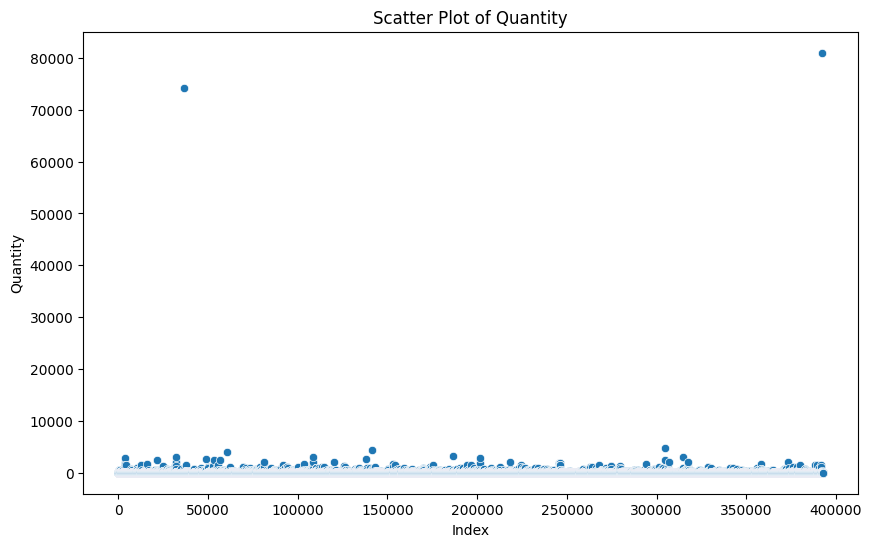

In [261]:
plot_scatter(df, 'Quantity', 'Scatter Plot of Quantity')

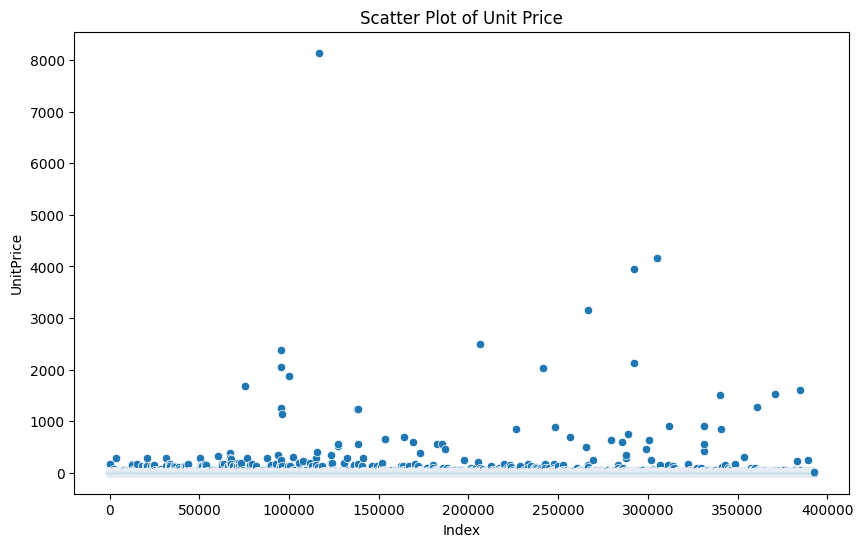

In [262]:
plot_scatter(df, 'UnitPrice', 'Scatter Plot of Unit Price')

In [263]:
def create_total_price(data):
    """Create a new column 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'."""
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
    return data

In [264]:
df_with_total_price = create_total_price(df)

print(df_with_total_price.shape)

df_with_total_price.head()

(392692, 12)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,12,20.34


In [265]:
df_with_total_price.drop(columns=['CustomerID', 'InvoiceNo']).describe()

,Quantity,UnitPrice,Year,Month,Day,TotalPrice
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,2010.934631,6.942077,15.704450,22.631500
std,180.492832,22.241836,0.247177,3.328222,8.047327,311.099224
min,1.000000,0.001000,2010.000000,1.000000,1.000000,0.001000
25%,2.000000,1.250000,2011.000000,4.000000,10.000000,4.950000
50%,6.000000,1.950000,2011.000000,7.000000,15.000000,12.450000
75%,12.000000,3.750000,2011.000000,10.000000,22.000000,19.800000
max,80995.000000,8142.750000,2011.000000,12.000000,31.000000,168469.600000


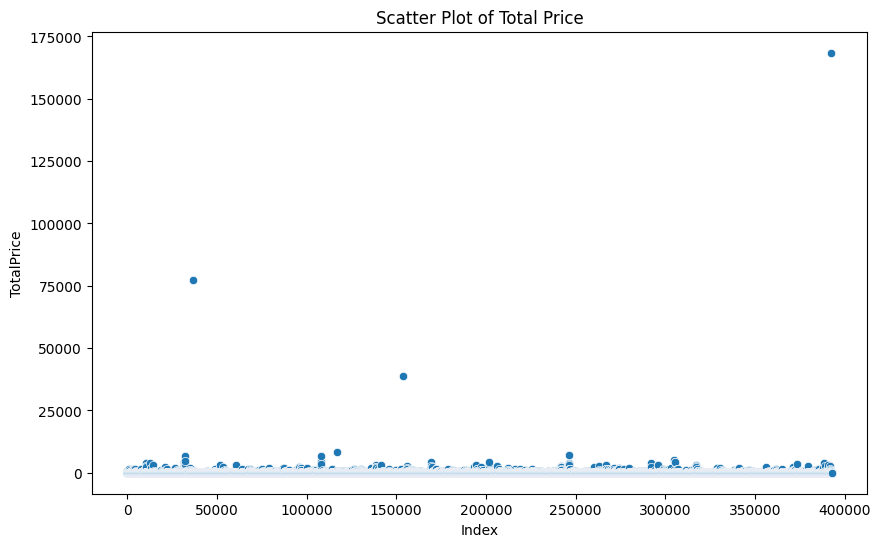

In [266]:
plot_scatter(df_with_total_price, 'TotalPrice', 'Scatter Plot of Total Price')

In [267]:
def remove_outliers(data, column):
    """Remove outliers from the specified column using the IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to get outliers
    outlier_data = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(outlier_data.shape[0])

    # Filter the data to remove outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data, outlier_data

In [268]:
print(df_with_total_price.shape)

df_without_outlier, outlier_data = remove_outliers(df_with_total_price, 'TotalPrice')

print(df_without_outlier.shape)

(392692, 12)
31231
(361461, 12)


**Analyze outlier data**

In [269]:
outlier_data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Year,Month,Day,TotalPrice
count,31231.000000,31231.000000,31231.000000,31231.000000,31231.000000,31231.000000,31231.000000,31231.000000
mean,559554.912587,73.606609,7.462241,14988.855752,2010.926611,6.835228,15.469598,144.523531
std,12983.511065,635.952193,78.130400,1735.009637,0.260778,3.361381,7.974517,1095.381737
min,536367.000000,1.000000,0.060000,12346.000000,2010.000000,1.000000,1.000000,42.120000
25%,548169.000000,12.000000,1.650000,13538.000000,2011.000000,4.000000,10.000000,59.400000
50%,560449.000000,32.000000,2.550000,14693.000000,2011.000000,7.000000,15.000000,79.200000
75%,570514.000000,72.000000,4.980000,16523.000000,2011.000000,10.000000,22.000000,139.200000
max,581586.000000,80995.000000,8142.750000,18287.000000,2011.000000,12.000000,31.000000,168469.600000


In [270]:
outlier_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,2010,1,12,54.08
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-01-12 08:45:00,3.75,12583.0,France,2010,1,12,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,12583.0,France,2010,1,12,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,12583.0,France,2010,1,12,45.00
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-01-12 08:45:00,2.95,12583.0,France,2010,1,12,53.10


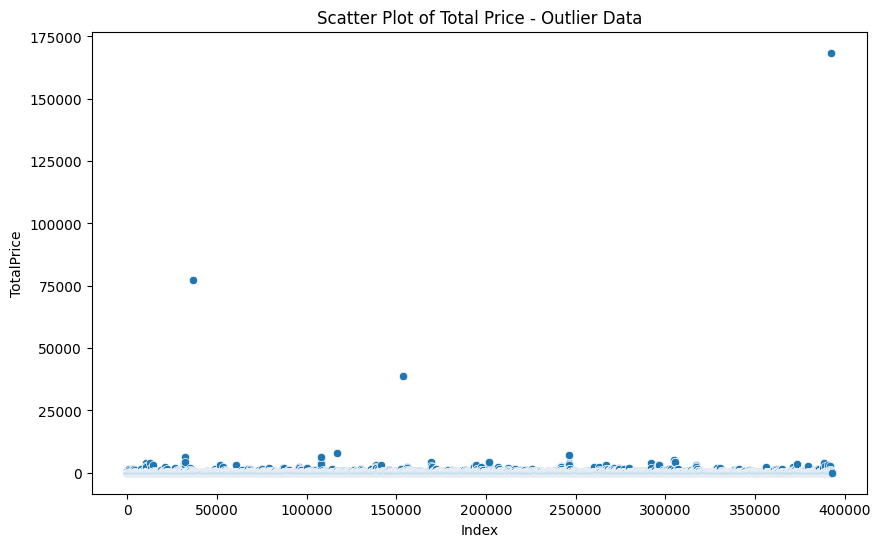

In [271]:
plot_scatter(outlier_data, 'TotalPrice', 'Scatter Plot of Total Price - Outlier Data')

In [272]:
outlier_data[outlier_data['TotalPrice'] > 25000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
36527,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,77183.6
153601,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06 15:28:00,649.50,15098.0,United Kingdom,2011,10,6,38970.0
392266,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,2011,9,12,168469.6


In [273]:

df_with_total_price[df_with_total_price['CustomerID'].isin([12346, 15098, 16446])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalPrice
36527,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,77183.60
132156,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,2011,5,18,1.65
132157,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,2011,5,18,1.25
153591,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-10-06 15:22:00,4.95,15098.0,United Kingdom,2011,10,6,297.00
153601,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06 15:28:00,649.50,15098.0,United Kingdom,2011,10,6,38970.00
153602,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-10-06 15:33:00,649.50,15098.0,United Kingdom,2011,10,6,649.50
392266,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,2011,9,12,168469.60


1. **Extreme Monetary Values**: The records associated with Customer IDs 12346, 15098, and 16446 exhibit exceptionally high total prices (e.g., over 77,000 and 168,000). These outlier values can disproportionately influence the results of the RFM analysis, leading to misleading interpretations of customer behavior.

2. **Distortion of RFM Metrics**: Including such high-value transactions can skew the Monetary score in the RFM analysis, causing other customers with more typical spending patterns to be undervalued. This may result in inaccurate segmentation and ineffective marketing strategies that do not target the right customer segments.

3. **Non-representative Purchases**: The nature of these transactions may not reflect standard purchasing behavior within the dataset. They could be one-time bulk purchases or unusual transactions that do not represent the average customer's purchasing habits.

4. **Focus on Typical Customer Behavior**: By removing these skewed records, the analysis will provide a clearer picture of regular customer behavior, enabling more meaningful segmentation and tailored marketing efforts.

5. **Improved Clarity**: Excluding these records enhances the clarity of the RFM analysis, allowing for a more accurate representation of customer value and loyalty, which can lead to more effective business decisions.

In [274]:
# Print the number of records before filtering
print(f"Number of records before: {df_with_total_price.shape[0]}")

# Remove extreme monetary values (for example, greater than 25000)
df_final = df_with_total_price[df_with_total_price['TotalPrice'] <= 275]

# Print the number of records after filtering
print(f"Number of records after: {df_final.shape[0]}")

Number of records before: 392692
Number of records after: 390352


**After removing outlier** 

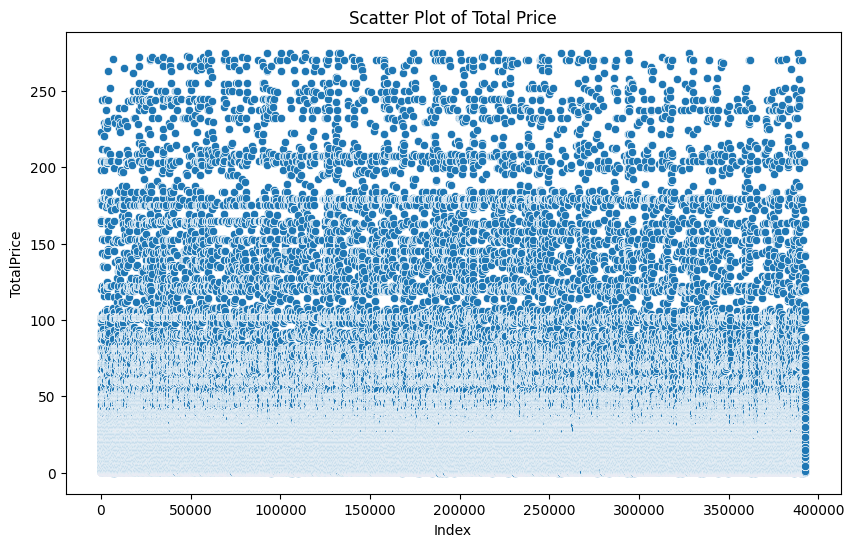

In [275]:
plot_scatter(df_final, 'TotalPrice', 'Scatter Plot of Total Price')

In [276]:
df_final.drop(columns=['CustomerID', 'InvoiceNo']).describe()

,Quantity,UnitPrice,Year,Month,Day,TotalPrice
count,390352.000000,390352.000000,390352.000000,390352.000000,390352.000000,390352.000000
mean,11.136072,2.927971,2010.934564,6.943705,15.706304,18.167341
std,25.663773,4.131838,0.247294,3.328835,8.049321,27.073678
min,1.000000,0.001000,2010.000000,1.000000,1.000000,0.001000
25%,2.000000,1.250000,2011.000000,4.000000,10.000000,4.950000
50%,6.000000,1.950000,2011.000000,7.000000,15.000000,11.900000
75%,12.000000,3.750000,2011.000000,10.000000,22.000000,19.800000
max,3186.000000,250.000000,2011.000000,12.000000,31.000000,275.000000


In [277]:
# K-Means Clustering Analsysi
df_final.to_csv('../resources/data/output/online_retail_kmeans.csv', index=False)

In [278]:
df_with_total_price.to_csv('../resources/data/output/online_retail_dbscan.csv', index=False)